### Code walkthrough - scratch implementation for threshold

#### Loading data

In [1]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 15.3MB/s]


In [2]:
regression_data = pd.read_csv('regData.csv')

In [3]:
regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [4]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


Ther are total of 600 datapoints

In [5]:
X = regression_data['X']
y = regression_data['Y']

#### Plotting data

In [6]:
from matplotlib import pyplot as plt

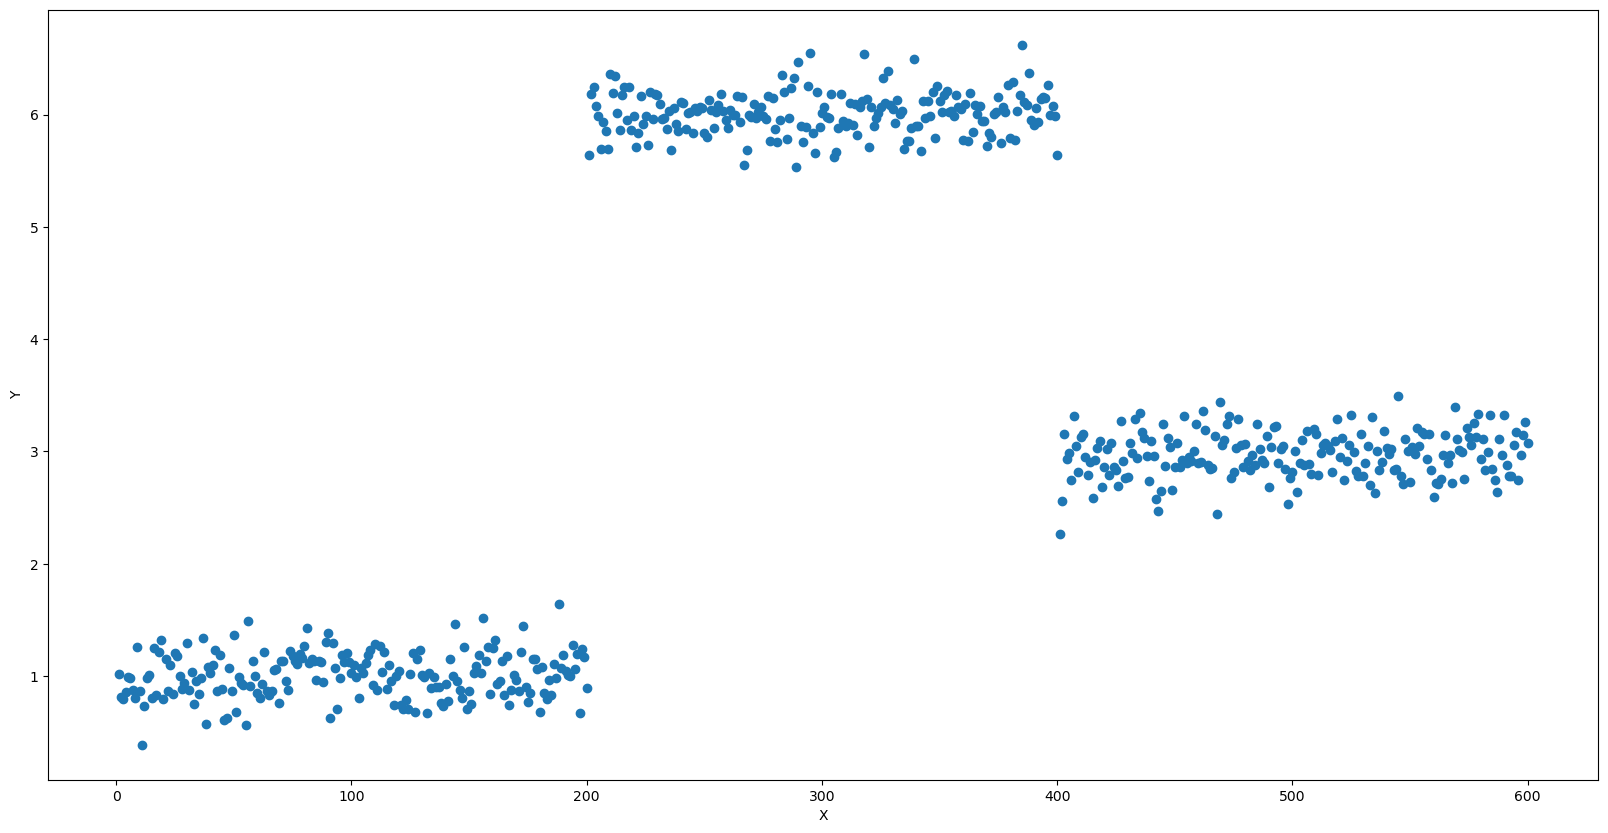

In [7]:
plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Splitting data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

#### Sorting feature to calculate threshold

In [9]:
thresholds = X_train.sort_values().unique()

In [10]:
thresholds

array([  1,   2,   4,   5,   6,   7,   8,   9,  10,  11,  14,  15,  17,
        19,  20,  21,  22,  23,  24,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  50,  51,  52,  53,  54,  55,  56,  57,  59,  60,  61,  63,
        65,  66,  67,  71,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  84,  85,  86,  87,  88,  89,  90,  92,  93,  94,  95,  96,
        98,  99, 100, 101, 102, 103, 105, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 119, 121, 123, 125, 126, 127, 129, 130,
       132, 133, 134, 135, 136, 137, 138, 141, 147, 148, 149, 150, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       168, 169, 170, 171, 172, 173, 174, 176, 178, 180, 182, 183, 185,
       188, 189, 190, 194, 195, 198, 199, 200, 201, 202, 203, 205, 208,
       209, 210, 212, 213, 214, 216, 217, 219, 220, 221, 223, 225, 226,
       227, 228, 230, 231, 233, 235, 237, 238, 240, 241, 242, 24

#### Calculating MSE

In [12]:
def calculate_MSE(y):
    if(y.shape[0] == 0):
        return 0

    y_pred = np.mean(y)

    n = y.shape[0]

    mse = np.sum((y - np.mean(y))**2)
    mse /= n

    return mse

#### Calculating delta MSE

In [13]:
def calulate_deltaMSE(y,mask):
    left_node_count = sum(mask)
    total = mask.shape[0]
    right_node_count = total - left_node_count

    parent_MSE = calculate_MSE(y)

    child_MSE = left_node_count/total*calculate_MSE(y[mask]) + right_node_count/total*calculate_MSE(y[~mask])

    deltaMSE = parent_MSE - child_MSE

    return deltaMSE



#### Calculating best threshold for split

In [14]:
delta_mse_train = []

for thr in thresholds:
    mask = X_train <= thr

    delta_MSE = calulate_deltaMSE(y_train, mask)

    delta_mse_train.append(delta_MSE)




In [15]:
delta_mse_train = np.array(delta_mse_train)

print(f'Best reduction in MSE is {delta_mse_train.max()} is for threshold: {thresholds[delta_mse_train.argmax()]}')

Best reduction in MSE is 2.539507086209006 is for threshold: 200


#### Note
sklearn implementation creates thresholds by taking average of two values.

Let's see an example:

- Say, we have feature $X_1$ as $[1,2,3,4,5]$.

- So, thresholds here will be $[1.5, 2.5, 3.5, 4.5]$

- i.e. First threshold will be  $\frac{1 + 2}{2} = 1.5$

- Similarly, second threshold will be $\frac{2 + 3}{2} = 2.5$

